# Experimenting with using seaborn to plot rows of histograms

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Local imports
from src import process
from src import plot

In [3]:
# Load data
data, ests = process.load_and_process_results()

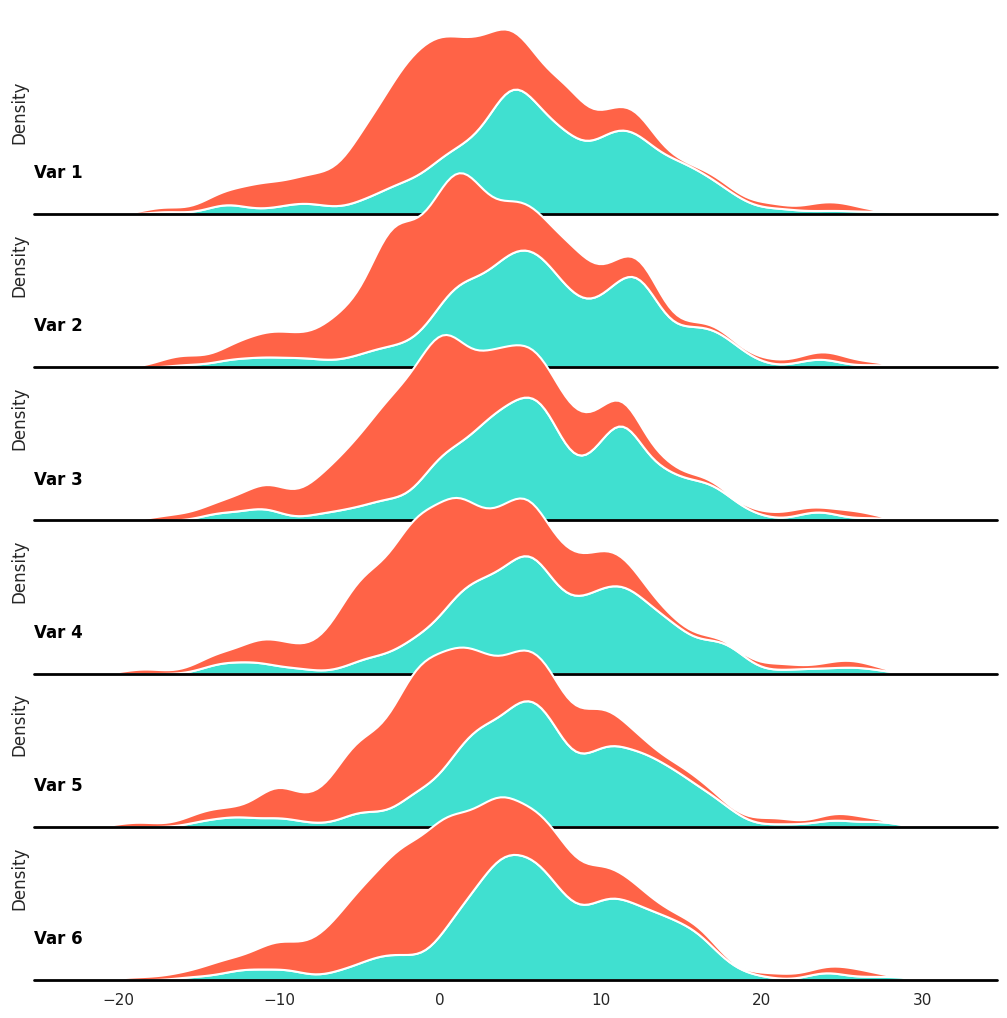

In [4]:
# Example ridgeplot from
# https://stackoverflow.com/questions/67299376/plot-stacked-density-distributions-of-variables-categorized-by-0-or-1-in-pyt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

"""
# id_vars is if superforcaster is yes in the data df
df_long = data.melt(
    id_vars='Superforecaster',
    value_vars=data.columns[6:12],
    var_name='variable',
    value_name='value' )
# Convert the variable column values to the number following "@" and ignore characters 
# after the number
df_long['variable'] = df_long['variable'].str.extract(r'@(\d+)').astype(int)
# Replace empty values with nan
df_long['value'] = df_long['value'].replace(r'^\s*$', np.nan, regex=True)
df_long['value'] = pd.to_numeric(df_long['value'])
df_long.head() 
"""

# Create the data
rs = np.random.RandomState(1979)
data = rs.randn(30, 100).cumsum(axis=1).reshape(-1, 6)
column_names = [f"Var {i}" for i in range(1, 7)]
df = pd.DataFrame(data, columns=column_names)
df["Status"] = rs.randint(0, 2, len(df))
for col in column_names:
    df.loc[df["Status"] == 1, col] += 5
df_long = df.melt(id_vars="Status", value_vars=column_names)

# Initialize the FacetGrid object
g = sns.FacetGrid(data=df_long, row="variable", aspect=6, height=1.8)

# Draw the densities
g.map_dataframe(
    sns.kdeplot,
    "value",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
    hue="Status",
    hue_order=[0, 1],
    palette=["tomato", "turquoise"],
    multiple="stack",
)
g.map(plt.axhline, y=0, lw=2, clip_on=False, color="black")


# Define and use a simple function to label the plot in axes coordinates
def label(x, color):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        x.iloc[0],
        fontweight="bold",
        color="black",
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "variable")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], xlabel="")
g.despine(bottom=True, left=True)
plt.show()

/home/jordan/documents/GitHub/acx-prediction-contest/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jordan/documents/GitHub/acx-prediction-contest/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jordan/documents/GitHub/acx-prediction-contest/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jordan/documents/GitHub/acx-prediction-contest/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. 

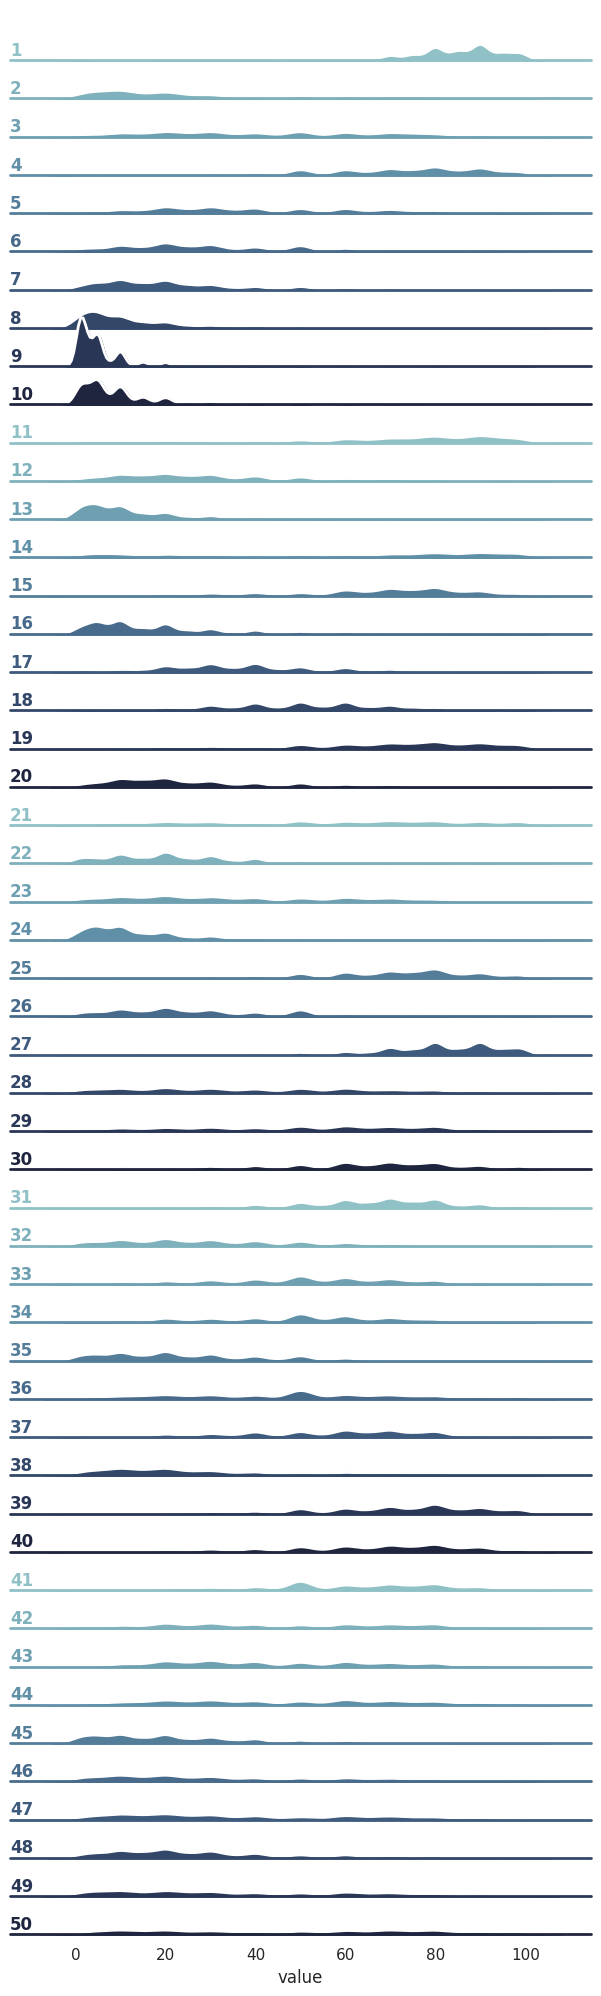

In [5]:
# A plot using sns.FaceGrid

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

df = ests.melt()

# Convert the variable column values to the number following "@" and ignore characters
# after the number
df["variable"] = df["variable"].str.extract(r"@(\d+)")

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
g = sns.FacetGrid(
    df, row="variable", hue="variable", aspect=15, height=0.5, palette=pal
)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    "value",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)